In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [32]:
df = pd.read_csv('customers_dataset.csv')
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [33]:
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)

In [34]:
X = df.iloc[:, :].to_numpy()
X = normalize(X)
X.shape

(200, 4)

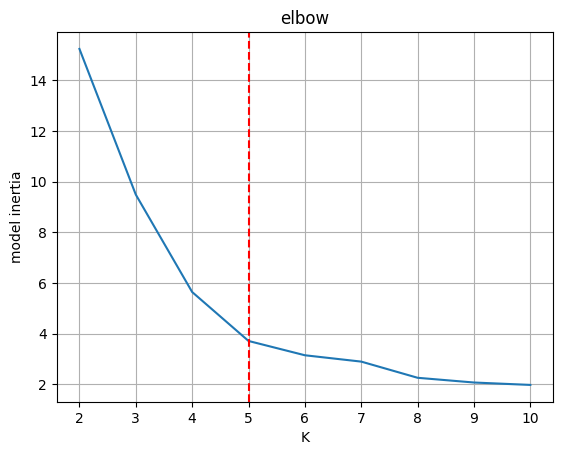

In [59]:
inertias = []
for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure()
plt.plot(np.arange(2, 11), inertias)
plt.axvline(x=5, linestyle='--', c='red')
plt.xlabel('K')
plt.ylabel('model inertia')
plt.title('elbow')
plt.grid()    

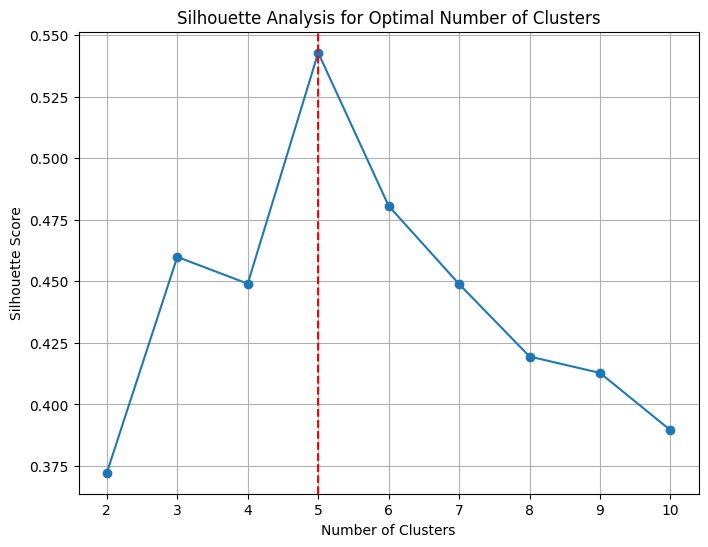

In [62]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))


plt.figure(figsize=(8, 6))
plt.plot(np.arange(2, 11), silhouette_scores, marker='o')
plt.axvline(x=5, linestyle='--', c='red')
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

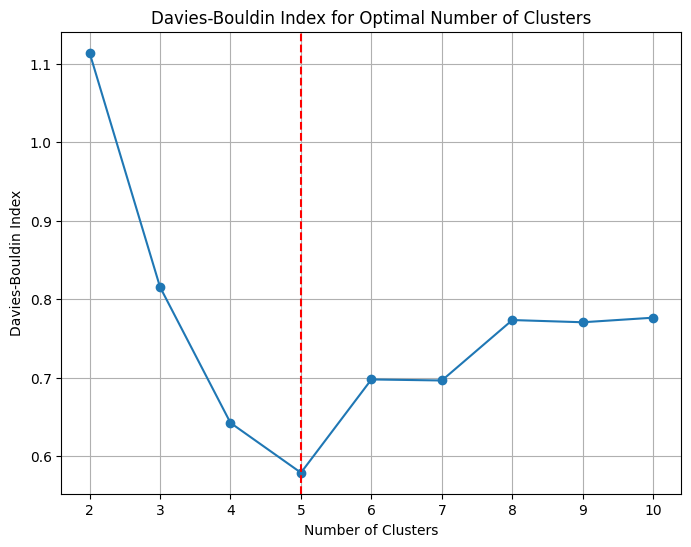

In [63]:
db_scores = []
for k in np.arange(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(X, labels)
    db_scores.append(db_score)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(2, 11), db_scores, marker='o')
plt.axvline(x=5, linestyle='--', c='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal Number of Clusters')
plt.grid()
plt.show()

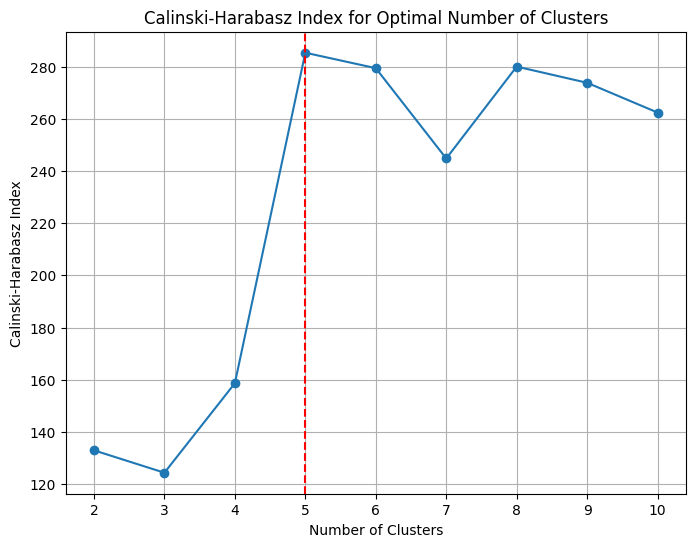

In [102]:
ch_scores = []
for k in np.arange(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(X, labels)
    ch_scores.append(ch_score)


plt.figure(figsize=(8, 6))
plt.plot(np.arange(2, 11), ch_scores, marker='o')
plt.axvline(x=5, linestyle='--', c='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Optimal Number of Clusters')
plt.grid()
plt.show()

In [103]:
def calculate_dunn_index(X, labels, k):
    min_intercluster_distance = np.inf
    
    max_intracluster_distance = 0
    
    for i in range(k):
        cluster_i = X[labels == i]
        if cluster_i.shape[0] > 1: 
            intra_distances = cdist(cluster_i, cluster_i, 'euclidean') 
            max_intracluster_distance = max(max_intracluster_distance, np.max(intra_distances))
        
        for j in range(i + 1, k):
            cluster_j = X[labels == j]
            inter_distances = cdist(cluster_i, cluster_j, 'euclidean')
            min_intercluster_distance = min(min_intercluster_distance, np.min(inter_distances))
    
    dunn_index = min_intercluster_distance / max_intracluster_distance
    return dunn_index

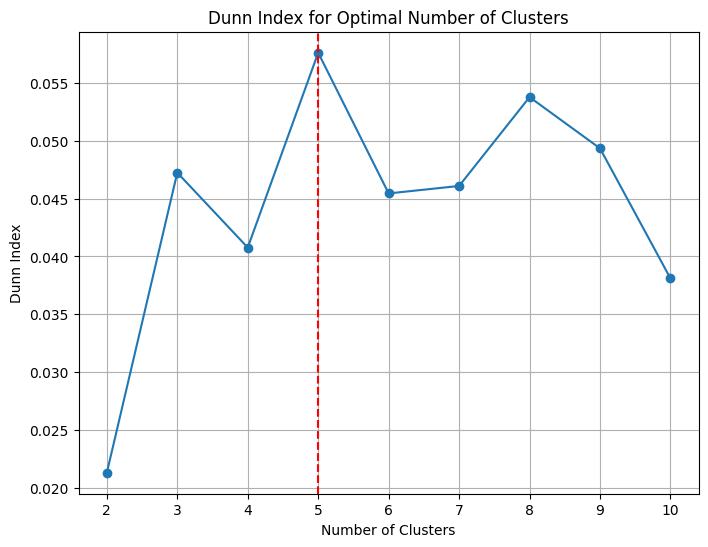

In [145]:
dunn_scores = []
for k in np.arange(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    dunn_score = calculate_dunn_index(X, labels, k)
    dunn_scores.append(dunn_score)




plt.figure(figsize=(8, 6))
plt.plot(np.arange(2, 11), dunn_scores, marker='o')
plt.axvline(x=5, color='r', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Dunn Index')
plt.title('Dunn Index for Optimal Number of Clusters')
plt.grid()
plt.show()

In [146]:
optimal_model = KMeans(n_clusters=5)
optimal_model.fit(X)

KMeans(n_clusters=5)

In [147]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [148]:
classes = {}
labels = optimal_model.predict(X)
for i in range(6):
    classes[i] = X_pca[labels == i]

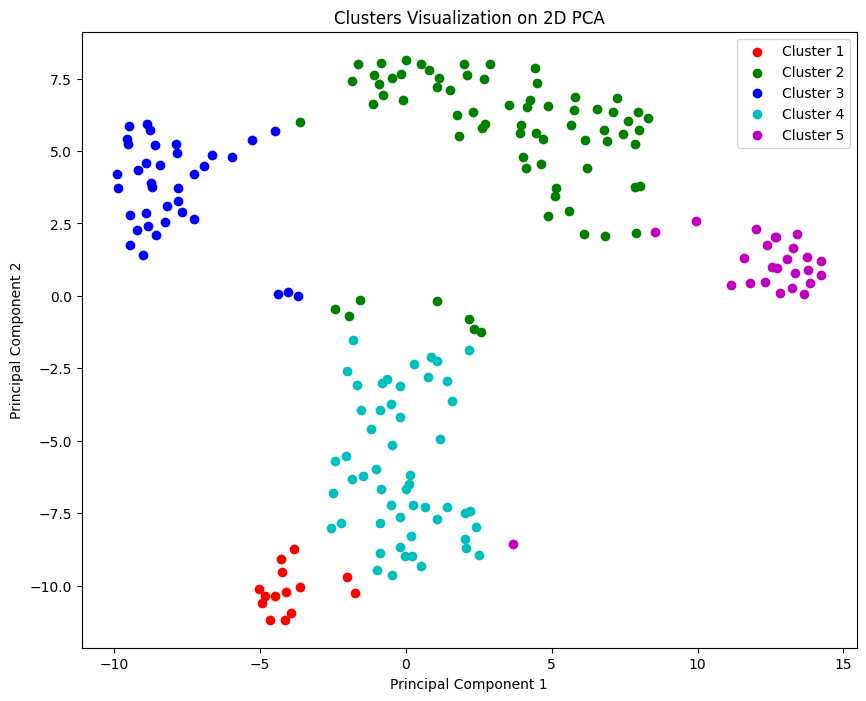

In [153]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']

plt.figure(figsize=(10, 8))
for i in range(5):
    cluster_points = classes[i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization on 2D PCA')
plt.legend()
plt.show()

In [154]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [155]:
classes = {}
labels = optimal_model.predict(X)
for i in range(5):
    classes[i] = X_tsne[labels == i]

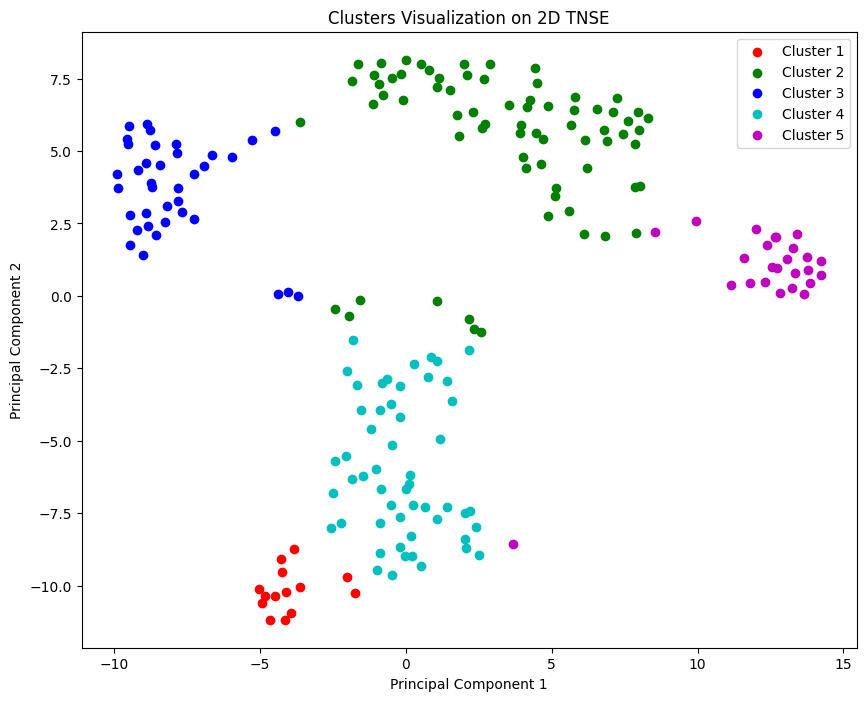

In [156]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']

plt.figure(figsize=(10, 8))
for i in range(5):
    cluster_points = classes[i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization on 2D TNSE')
plt.legend()
plt.show()